<a href="https://colab.research.google.com/github/liamedeiros/Newton2BlackHoles/blob/main/Projectile_Motion_and_orbits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projectile Motion and Orbits

This notebook primarily follows the Day 2 curriculum of ["From Newton to Black Holes"](https://www.dropbox.com/s/kbfx7bq4eukopuz/Lesson%20Plan_From%20Newton%20to%20Black%20Holes.pdf?dl=0), which was developed as part of the NSF funded project [Black Hole PIRE](https://bhpire.arizona.edu/).

Learning objectives for this notebook:
* Explore the motion of projectiles on the surface of the Earth
* Understand orbits as the continuous free fall of a projectile around the Earth

before we begin, please compile the cell below to load in the necessary libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib
# from matplotlib import rcParams
from matplotlib import rc
%matplotlib inline
!apt-get update
!apt install cm-super
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

In this notebook you will explore the motion of projectiles on the Earth's surface and understand them in terms of Newton's theory of gravity.

For your first exploration, you will use the following web-based app developed at the University of Colorado: [https://phet.colorado.edu/en/simulation/projectile-motion](https://phet.colorado.edu/en/simulation/projectile-motion).


The figure below shows a screenshot from the app, and points out a few of its controls. With this app, you can launch a projectile from a cannon and watch it as it free falls towards the surface of the Earth, following a parabolic trajectory.

![projectile motion](https://github.com/liamedeiros/Newton2BlackHoles/blob/main/projectile_motion.png?raw=1)

You can:
* Change the initial height of the cannon
* Change the angle of the cannon
* Change the initial speed of the projectile
* Change the type of projectile you are using
* Move the bullseye to measure the distance the projectile traveled.



1. **Set the cannon at 30 degrees, the initial height of the cannon to 0m, the initial speed at 10 m/s, and turn off air resistance. Change the mass and the type of the projectile (try throwing a piano!). Do these changes affect the trajectory of the objects?**

Fill in the answer in the text cell below.


2. **Set the cannon to 30 degrees, the initial height to 0 m, and turn off air resistance. Change the initial velocity from 5 m/s to 30 m/s. Move the location of the bullseye to match where your object landed to get an accurate measurement of horizontal distance. Fill in the following table with the horizontal distance that the object travelled as a function of initial velocity. Plot your results either on the graph on the right, on graph paper, a graphing calculator, or on a computer. For the latter, you can use Microsoft Excel or the programming/graphing language of your choice.**

Use the cell below to plot the results of exercise 2. Plot the horizontal distance on the y-axis and the initial velocity on the x-axis. Remember to add a grid and label your axes.

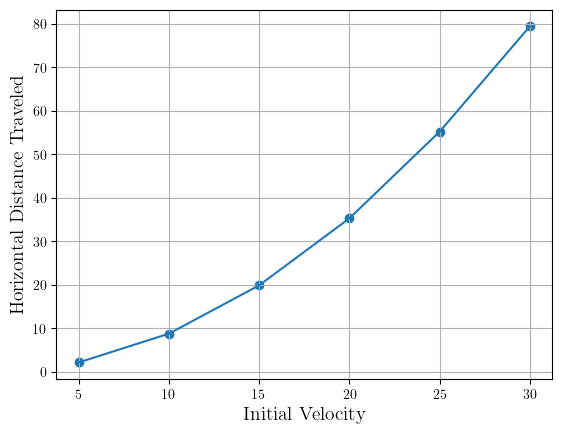

In [3]:
# Solution!

initial_velocity_array = np.array([5, 10, 15, 20, 25, 30])
horizontal_distance_array = np.array([2.18, 8.8, 19.9, 35.3, 55.2, 79.4])

plt.plot(initial_velocity_array, horizontal_distance_array)
plt.scatter(initial_velocity_array, horizontal_distance_array)

plt.xlabel('Initial Velocity', size=14) # this command adds a label to the x-axis, and this label is "x"
plt.ylabel('Horizontal Distance Traveled', size=14) # this command adds a label to the y-axis, and this label is "y"
plt.grid() # this command adds a grid to the graph


3. **Based on your plot of the experiment above what did you learn? How is initial velocity related to horizontal distance traveled?**

Fill in your answer in the text cell below.



For our second exploration, we will use the following web-based app developed at Weber State University:
[https://physics.weber.edu/schroeder/software/NewtonsCannon.html](https://physics.weber.edu/schroeder/software/NewtonsCannon.html)

The figure below shows a screenshot from the app, and points out a few of its controls. The drawing is actually a reproduction of the figure used by Newton himself to explain why an orbit is a continuous free fall.
With this app, you can launch a projectile in the horizontal direction from the top of a mountain and follow its trajectory.

![Newtons Cannon](https://github.com/liamedeiros/Newton2BlackHoles/blob/main/Newtons_cannon.png?raw=1)

You can:
* Change the initial speed of the projectile
* Add sound effects!

We can now use this app to extend the understanding we gained in questions 1-3 and ask what would happen if we fired the cannon with such a high velocity that the range becomes comparable to the radius of the Earth. The fact that the Earth is not flat is important here.



4. **Increase the initial speed of the projectile. How high should the initial velocity be in order to send the projectile into an orbit?**

Fill in your answer in the text cell below.


We will now go back to the projectile motion exercise (number 2 above). Notice that as initial velocity increases the amount by which the distance traveled increases, also increases. In other words, this plot is not a straight line, but curves up. This might even remind you a bit of a parabola.

5. **To test this, plot the initial velocity squared as a function of the distance traveled below.**

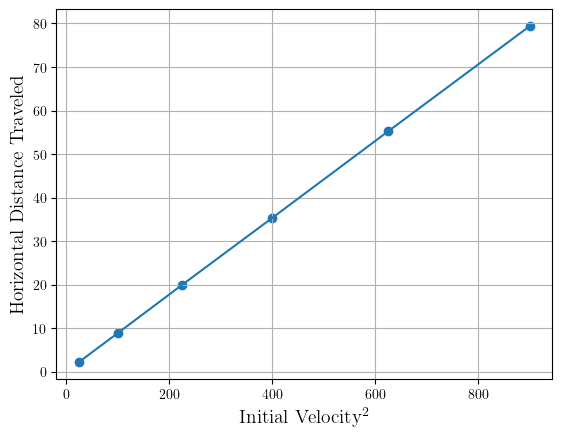

In [5]:
# Solution!

initial_velocity_array = np.array([5, 10, 15, 20, 25, 30])
horizontal_distance_array = np.array([2.18, 8.8, 19.9, 35.3, 55.2, 79.4])

plt.plot(initial_velocity_array**2, horizontal_distance_array)
plt.scatter(initial_velocity_array**2, horizontal_distance_array)

plt.xlabel('Initial Velocity$^2$', size=14) # this command adds a label to the x-axis
plt.ylabel('Horizontal Distance Traveled', size=14) # this command adds a label to the y-axis
plt.grid() # this command adds a grid to the graph

6.  **Is this plot a straight line? If so, what this really means is that these points follow the equation $y=mx+b$ where $x=\mathrm{initial\,velocity}^2$, $m$ is the slope the line in the plot above, and $b$ is the y-intercept, which is close to zero.**

In [ ]:
def projectile_motion(v0, theta):
  t = np.arange(400)/100
  theta = theta/360*2.*np.pi
  g=9.8

  x=v0*t*np.cos(theta)
  y=v0*t*np.sin(theta) - 0.5*g*t*t

  # we only care about where y >=0
  where_we_want = np.where(y>=0)
  x[where_we_want]
  plt.plot(x[where_we_want],y[where_we_want])
  plt.axhline(y=0, c='k')
  plt.grid()
  plt.xlabel('Horizontal Distance', fontsize=14)
  plt.ylabel('Height', fontsize=14)

In [ ]:
theta = 30

for v0 in [5,10,15,20,25,30]:
  projectile_motion(v0, theta)

In [ ]:
v0=10
t = np.arange(100)/80
theta = 30
theta = theta/360*2.*np.pi
g=9.8


x=v0*t*np.cos(theta)
y=v0*t*np.sin(theta) - 0.5*g*t*t

In [ ]:
plt.plot(x,y)
plt.axhline(y=0)

x_point = 2*np.tan(theta)*v0*v0*np.cos(theta)**2/g
plt.scatter(x_point, 0)